# Análise do consumo de combustíveis no Brasil 

***

Nesse relatório analizarei a evolução do consumo de combustíveis no Brasil entre os anos de 2000 a 2020.

Para esse objetivo, utilizarei uma base de dados compilada pela ANP - Agência Nacional do Petróleo -, que traz valores mensais sobre o consumo, em metros cúbicos, dos 3 produtos mais populares no país: Diesel, Gasolina e Etanol. 

<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Anp-logo-3.png" width="400"  height="200">


O objetivo desse projeto é fornecer insumos para embasar a decisão de investimento de uma distribuidora de combustíveis que pretende expandir sua capacidade operacional. Para tal, a companhia deseja compreender com uma maior profundidade quais são os determinantes da demanda de combustíveis nas localidades em que atua.

Esse relatóro foi requisitado pela <b>4Intelligence</b>, uma startup mineira de tecnologia e ciência de dados, para selecionar um estagiário para o seu time de pesquisa econômica.

Nesse processo, a empresa encaminhou um arquivo em excel com 3 planilhas contendo uma amostra da base de dados da ANP com 8 estados:
<b>
                                    Distrito Federal,
                                    Góias,
                                    Maranhão,
                                    Mato Grosso,
                                    Minas Gerais,
                                    Pará,
                                    São Paulo,
                                    Tocantinns,
</b>
Além disso, também temos os valores agregados do conumo no <b>Brasil</b>.


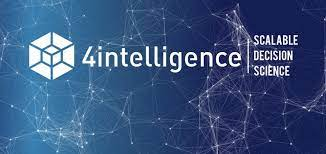

O desafio proposto nesse processo consiste, inicialmente, em uma análise exploratória da base da ANP, buscanodo <b>compreender como evolui a demanda por combustível nos estados selecionados, focando na compreensão dos efeitos da sazonalidade e no tamanho do mercado endereçavel.</b>

Dito isso, iniciarei com a importação dos pacotes que  seram utilizados nesse projeto. Em seguida, realizarei o carregamento dos dados fornecidos e uma breve análise inicial sobre suas informações.

## Carregando os dados

In [1]:
# Pacotes que serão utilizados nesse processo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [2]:
#Link com a base de dados fornecido pela 4Intelligence
url=r'https://email.gupy.com.br/c/eJw9UMtqxDAM_JrkluBHHvLBh176G4sSyV3Dxg62t93062u3UBBIMxqGkdjKZZUgtAHVk3UOFql6b5VQSiqlpZ7NpEa9zXIzTKtWeq9UN4mP53mNezzGLfV3K1jTAjThNBOhIc3LCuR2AKeEW6F_2HspZ-70W6fea2U94oHfMeBXbjaVao5z7WeK9NyLj6GCujoxeM51Xlaha-MD_aPh_-gSQDQtG8NuE8PMPA9SMg0AkgfQJHaz8ATUZIQU8404o_ORsGDePYfic_GhcAq3Tw6EVVGZ5Lenp5gqxHCOr0d-9ckmvijHcGCJub2iBWpH9MX-5b1uvyF_AH59b6w'

#Trata-se de um arquivo excel constituida por 3 planilhas, um para cada combustível.
#Dessa forma, criarei 3 variáveis para receber cada planilha, de acordo com cada tipo de combustível

diesel=pd.read_excel(url,sheet_name ='diesel')
gasolina=pd.read_excel(url,sheet_name ='gasolina')
etanol=pd.read_excel(url,sheet_name ='etanol')

## Análise dos dados

As 3 planilhas trazem atributos iguais sendo sua única diferença o tipo de combustível. Com isso, temos que o total de linhas para cada uma das bases são iguais.

In [3]:
#Atributos de uma planilha se refere a suas colunas

print(f"Total de atributos da planilha sobre os dados de Diesel: {diesel.shape[1]}; e seu total de linhas: {diesel.shape[0]}")
print(f"Total de atributos da planilha sobre os dados do Etanol: {etanol.shape[1]}; e seu total de linhas: {etanol.shape[0]}")
print(f"Total de atributos da planilha sobre os dados da Gasolina: {gasolina.shape[1]}; e seu total de linhas: {gasolina.shape[0]}")

Total de atributos da planilha sobre os dados de Diesel: 23; e seu total de linhas: 108
Total de atributos da planilha sobre os dados do Etanol: 23; e seu total de linhas: 108
Total de atributos da planilha sobre os dados da Gasolina: 23; e seu total de linhas: 108


In [4]:
#monstrando as 5 primeiras linhas
diesel.head()

,regiao,meses,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,df,1,23310.896,29319.999,30934.830,29295.326,24360.754,27745.916,28110.059,26414.443740,...,27775.156551,27828.123770,31349.982,33989.250,35430.273169,28797.050,27828.534246,26758.416,27481.500,28437.000
1,df,2,25967.743,27720.714,27585.412,28328.216,23477.298,27132.401,26344.263,25573.618074,...,29603.591990,31540.083628,30453.300,34968.900,31957.200000,31339.200,27313.777397,25848.095,29089.500,30150.000
2,df,3,24590.674,32149.816,32724.180,28047.691,30092.094,31146.971,31039.292,31875.141129,...,32997.908444,36202.519600,34267.700,35642.943,37278.568265,34351.200,33516.663013,32373.071,29682.500,29206.000
3,df,4,24975.963,32156.821,33863.218,31787.357,29433.731,31062.637,28794.417,30286.788490,...,33374.872798,33602.215777,36087.800,36848.905,36476.001000,32500.850,28361.689945,30314.696,30781.429,22863.382
4,df,5,27224.597,34122.639,34484.371,32476.371,30442.965,31339.791,32818.387,32274.266232,...,34268.977950,36364.245354,36738.123,39003.000,36793.025000,32512.108,31433.943013,29546.745,31945.500,25737.500


In [5]:
#monstrando um resumo sobre as informações dos atributos
diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   regiao  108 non-null    object 
 1   meses   108 non-null    int64  
 2   2000    108 non-null    float64
 3   2001    108 non-null    float64
 4   2002    108 non-null    float64
 5   2003    108 non-null    float64
 6   2004    108 non-null    float64
 7   2005    108 non-null    float64
 8   2006    108 non-null    float64
 9   2007    108 non-null    float64
 10  2008    108 non-null    float64
 11  2009    108 non-null    float64
 12  2010    108 non-null    float64
 13  2011    108 non-null    float64
 14  2012    108 non-null    float64
 15  2013    108 non-null    float64
 16  2014    108 non-null    float64
 17  2015    108 non-null    float64
 18  2016    108 non-null    float64
 19  2017    108 non-null    float64
 20  2018    108 non-null    float64
 21  2019    108 non-null    float64
 22  20

Observando as 5 primeiras linhas de nossos dataframes (representado pelo tipo diesel)  percebemos que as colunas (atributos) são representadas pelas informações de região, mês e os anos.

Observando os tipos de dados para cada atributo, nota-se que todos já estão em perfeita marcação, com as informações sobre os estados ('região') sendo o único atributo no formato de texto ('string') e a coluna meses com o formato inteiro, já que trata-se de um conjunto que vai de 1 a 12, representando os meses do ano.

As colunas com os dados de consumo em cada ano estão marcados com o tipo float, ou número real, já que a unidade de medida utilizada é a metro cúbico, ou seja, espera-se que seus valores sejam mensurados em níveis mais granulares do que o suportado pela dimensão dos números inteiros, logo é possível concluir que tais informações já estão bem referenciados.

Por sorte, percebemos que nossa base não contém nenhum dado faltante ou NaN (nulo), o que representaria a perda de informações.

In [6]:
#extraindo as informações da coluna 'região'
#print(list(diesel['regiao'].unique()))
#print(list(gasolina['regiao'].unique()))
print(list(etanol['regiao'].unique()))
#cada base é formada pelos mesmos estados
estados=list(etanol['regiao'].unique())
print(f"\nTemos um total de {len(estados)-1} estados selecionados na pesquisa, mais os dados agragados do Brasil (br).")

['df', 'go', 'ma', 'mt', 'mg', 'pa', 'sp', 'to', 'br']

Temos um total de 8 estados selecionados na pesquisa, mais os dados agragados do Brasil (br).


Para melhorar a capacidade de análise sobre os dados é preferível agrupá-los em um único DataFrame.

Outro ponto é que a forma como os dados estão dispostos não facilita o manuseio de recursos gráficos, além de ser mais difícil de modelar. 

O próximo passo será reformatar os dados em um único dataframe contendo a dimensão temporal nas linhas e o consumo na coluna.

### Remodelando os dados em um único DataFrame

Primeiro, vamos organizar os dados em uma estrutura de dicionário.

Vamos dividir cada linha pelos seguintes atributos:
<b>
Tipo,
Estado,
Mês,
Ano,
Periodo (Mês/Ano),
Valor.
</b>

Em seguida, transformaremos esse dicionário em uma nova fonte de dados que chamaremos simplesmente de 'base', ela será a ponta de partida de nossa análise. 

In [7]:
#adicionando uma nova coluna em cada Dataframe para marcar o tipo de combustível
diesel['Tipo']='Diesel'
gasolina['Tipo']='Gasolina'
etanol['Tipo']='Etanol'

#Adicionando os 3 dataframes em apensas um
fuel=pd.concat([diesel,gasolina,etanol],ignore_index = True)

#O ano de 2016 ('Título da coluna') está salvo como string e por isso é necessário ajustá-lo para inteiro.
fuel = fuel.rename(columns={"2016":2016})

In [8]:
esperado=fuel.shape[0]*(fuel.shape[1]-3)
print(f"Quantidade de valores esperados para nosso dicionário: {esperado}")

Quantidade de valores esperados para nosso dicionário: 6804


In [9]:
#abaixo temos nossa lógica para extrair nosso dicionário
dados_fuel=[]
dict={}
cont=1 #vai servir para marcar a posição para a próxima inserção na lista

for i in range(fuel.shape[0]):
        tipo=fuel.loc[i]['Tipo']
        estado=fuel.loc[i]['regiao']
        mes=fuel.loc[i]['meses']
        for x in range(2000,2021,1):
            dict['Tipo']=tipo
            dict['Estado']=estado
            dict['Mes']=mes
            dict['Ano']=x
            dict['Periodo']=str(mes)+'/'+str(x)
            valor=fuel.loc[i][x]
            dict['Valor']=round(valor,4)
            filtro=dict
            dados_fuel.insert(cont,filtro)
            cont+=1 
            dict={}
            
#Vamos checar se a extração trouxe a quantidade de dados esperada
if esperado==len(dados_fuel):
    print(f"O resultado de nosso filtro foi um sucesso!\n{esperado} valores encontrados")
else: 
    print("Houve algum erro em nossa filtragem, por gentileza verificar!")

O resultado de nosso filtro foi um sucesso!
6804 valores encontrados


In [10]:
#Nosso novo DataFrame para análise
base=pd.DataFrame(dados_fuel)

#As 5 primeiras linas
base.head()

,Tipo,Estado,Mes,Ano,Periodo,Valor
0,Diesel,df,1,2000,1/2000,23310.896
1,Diesel,df,1,2001,1/2001,29319.999
2,Diesel,df,1,2002,1/2002,30934.830
3,Diesel,df,1,2003,1/2003,29295.326
4,Diesel,df,1,2004,1/2004,24360.754


In [11]:
#Infoormações resumidas
base.info()
#Os dados continuam com os tipos bem especificados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tipo     6804 non-null   object 
 1   Estado   6804 non-null   object 
 2   Mes      6804 non-null   int64  
 3   Ano      6804 non-null   int64  
 4   Periodo  6804 non-null   object 
 5   Valor    6804 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 319.1+ KB


Agora temos nossos dados modelados de maneira mais inteligente para a análise de séries temporais. O tamanho da base agora é de 6804 linhas.

Nessa nova base o atributo 'Tipo' é um marcador que informa se a observação é do tipo diesel, etanol ou gasolina.

Nessa nova conjuntura temos várias sub-bases para cada estado e tipo de combustível. Faremos outras filtragens à frente.

# Explorando os dados

1. Qual é a sazonalidade da venda de combustíveis? 
2. Essa sazonalidade é igual em todos os estados? 
3. Como o consumo de cada tipo de combustível está distribuído entre os estados brasileiros? 
4. Qual é o tamanho total do mercado e como o mercado evoluiu durante os últimos 5 anos?

# Extraindo a tendência e sazonalidade dos dados
---




Para analizarmos a sazonalidade do consumo de Diesel em todos os estados selecionados nesta pesquisa, adotaremos inicialmente uma metodologia em que somaremos o consumo no mesmo período entre todos os estados.

Apesar de haver divergencias relevantes entre as características de cada estado como número de habitantes, renda per capitam tamanho da frota que limitam a comparação direta entre as diferntes regiões, nos concetraremos em observar em um primeiro momento o consumo agregado por produto.

In [12]:
#Vamos capturar as somas das vendas em cada período para todas os estados
#Adicionamos uma variável na função para especificar se queremos os valores agregados do Brasil
#A variável BR=0 significa todos os estados menos Br e =1 apenas o BR.
def extrair_total_todos(dados,tipo,BR=0):#vai receber um dataframe com todos os dados e o tipo de combustível
    mensal_dict={}
    mensal=[]
    cont=1
    if BR == 0:
        dados=dados.query('Estado!="br"')#tirando os dados agregados do Brasil 
    else:
        dados=dados.query('Estado=="br"')#apenas dados agregados do Brasil
    for i in range(2000,2021,1): #ano
        for x in range(1,13,1):#mes
            period=str(x)+'/'+str(i)
            Af=(dados[dados['Tipo']==tipo]) 
            df=Af[Af['Periodo']==period]
            result=round(df['Valor'].sum(),2)
            mensal_dict['Mes']=x
            mensal_dict['Ano']=i
            mensal_dict['Periodo']=period
            mensal_dict['Valor']=result
            mensal.insert(cont,mensal_dict)
            cont+=1 
            mensal_dict={}
    #checando a filtragem        
    esperado=len(list(Af['Periodo'].unique())) #representa quantos valores esperamos retonrne na série     
    if esperado==len(mensal):
        #print(f"O resultado para filtragem dos valores de {tipo} foi um sucesso!\n{esperado} valores encontrados")
        a=pd.DataFrame(mensal)
        a.drop(columns=['Mes','Ano','Periodo'],inplace=True)
        a.set_index(pd.date_range('2000',freq='M',periods=esperado),inplace=True)
        return a
    else: 
        print("Houve algum erro em nossa filtragem, por gentileza verificar!")

In [13]:
base_diesel=extrair_total_todos(base,"Diesel",BR=0)
base_etanol=extrair_total_todos(base,"Etanol",BR=0)
base_gasolina=extrair_total_todos(base,"Gasolina",BR=0)
br_diesel=extrair_total_todos(base,"Diesel",BR=1)
br_etanol=extrair_total_todos(base,"Etanol",BR=1)
br_gasolina=extrair_total_todos(base,"Gasolina",BR=1)

Filtramos 3 dataframes (base_diesel,base_etanol,base_gasolina) contendo um histórico mensal do consumo nos estados selecionados, para cada tipo de combústivel.

Também, criamos 3 dataframes com a série de conumo para o Brasil para cada um dos combustíveis (br_diesel,br_etanol,br_gasolina).

A partir daqui faremos uma análise de sazonalidade dessas consumos.

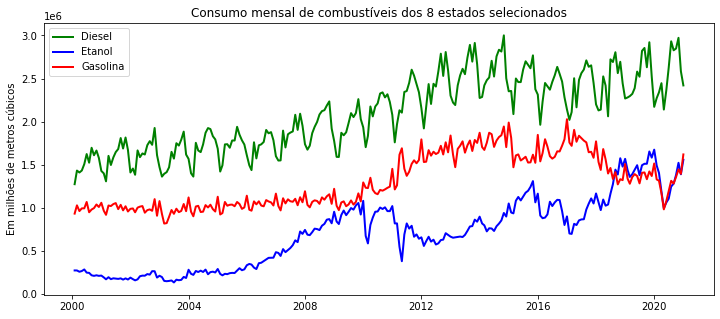

In [14]:
plt.rcParams["figure.figsize"] = (12, 5)
plt.plot(base_diesel.Valor,color='green', linewidth=2, label='Diesel')
plt.plot(base_etanol.Valor,color='blue', linewidth=2, label='Etanol')
plt.plot(base_gasolina.Valor,color='red', linewidth=2, label='Gasolina')
plt.legend()
#plt.xlabel('Frequência mensal')
plt.ylabel('Em milhões de metros cúbicos')
plt.title("Consumo mensal de combustíveis dos 8 estados selecionados")
plt.show()

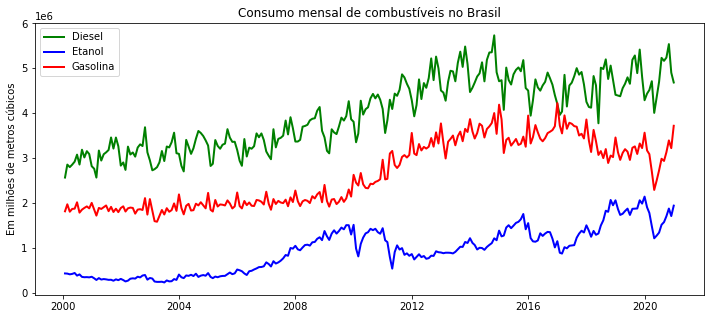

In [15]:
plt.rcParams["figure.figsize"] = (12, 5)
plt.plot(br_diesel.Valor,color='green', linewidth=2, label='Diesel')
plt.plot(br_etanol.Valor,color='blue', linewidth=2, label='Etanol')
plt.plot(br_gasolina.Valor,color='red', linewidth=2, label='Gasolina')
plt.legend()
#plt.xlabel('Frequência mensal')
plt.ylabel('Em milhões de metros cúbicos')
plt.title("Consumo mensal de combustíveis no Brasil")
plt.show()

Acima, há dois gráficos. O primeiro apresenta a evolução do consumo de cada combustível nos 8 estados selecionados na amostra. Já o segundo é uma representação do consumo total no Brasil. 

Em um primeiro olhar é perceptível a <b>forte sensação de sazonalidade no consumo de diesel</b>, tanto para os 8 estados quanto em nível nacional. 

Para o consumo de gasolina e etanol o impacto da sazonalidade parece apresentar medidas mais suaves. Olhando atentatemente para o consumo desses combustíveis em comparação ao diesel, percebe-se mais suavidade nas oscilações ao longo do tempo, com <b>a série do etanol apresentando-se como menos sazonal do que a gasolina e diesel</b>. Esse padrão fica evidente também na série nacional.

Nota-se uma característica importante com o consumo de gasolina e etanol. Observando as séries, <b>podemos presumir que ambos os produtos tenham características de bens substitutos</b>. Nos dois gráficos, até meados de 2011, o consumo de gasolina era estável, em torno de 1,08 milhões de metros cúbicos consumidos para os 8 estados e 2,08 milhões em nível nacional, enquanto que o etanol percorria uma tendencia clara de crescimento.

<b>Pós 2012, temos uma impressão de virada de ciclo entre o consumo de gasolina e etanol</b>. Para os 8 estados selecionados essa inflexão é bastante nítida, na verdade, olhando como se dá a dinãmica de consumo do etanol frente ao visto há nível nacional, <b>podemos dizer que em nossa amostra, temos os maiores players consumidores desse produto</b>.

A relação substituta entre o consumo de gasolina e etanol pode ser facilmente explicada pela popularização no Brasil dos motores flex, na segunda metade da 1° década do século XXI - por volta de 2006. Desse momento, os consumidores passaram a arbitrar entre dois diferentes produtos com a mesma finalidade, mas com  dinâmicas de preços distintas: a gasolina influenciada pela cotação do petróleo ou o etanol, que no Brasil está intimamente ligado a produção do açucar.

Dado que o Brasil é um dos maiores produtores de cana-de-açucar do mundo, além de deter a tecnologia para a produção do etanol, porque após 2012 o consumo de gasolina cresceu para níveis superiores ao consumo de etanol? Visto que havia uma clara evidência de que esse se tornaria o 2° combustível mais consumido, pelo menos para os 8 estados selecionados.  

Provavelmente, apenas se utilizando desses dados da ANP não conseguiremos responder a essa pergunta, apesar de ser bastante instigante.

In [16]:
#média do consumo de gasolina nos 8 estados selecionados até 2011
print((base_gasolina[base_gasolina.index.year <2012].mean())/1000)
#média do consumo de gasolina no Brasil até 2011
print((br_gasolina[br_gasolina.index.year <2012].mean())/1000)

Valor    1083.462781
dtype: float64
Valor    2084.870469
dtype: float64


Uma aproximação da tendência de uma série temporal pode ser obtida por meio da média móvel de seus valores.

Para captar a tendência do consumo de combustíveis utilizaremos a média móvel de 12 meses, o que deve nos trazer uma boa visão de como evoluiu o comportamento na demanda por diesel, gasolina e etanol nos estados selecionados e no Brasil.

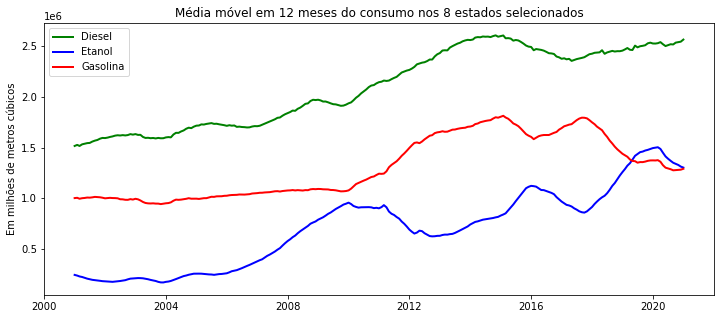

In [17]:
plt.rcParams["figure.figsize"] = (12, 5)
a=base_diesel.rolling(12).mean() #média movel 12 meses do diesel
b=base_etanol.rolling(12).mean() #média movel 12 meses do etanol
c=base_gasolina.rolling(12).mean() #média movel 12 meses da gasolina
plt.plot(a,color='green', linewidth=2, label='Diesel')
plt.plot(b,color='blue', linewidth=2, label='Etanol')
plt.plot(c,color='red', linewidth=2, label='Gasolina')
plt.legend()
#plt.xlabel('Frequência mensal')
plt.ylabel('Em milhões de metros cúbicos')
plt.title("Média móvel em 12 meses do consumo nos 8 estados selecionados")
plt.show()

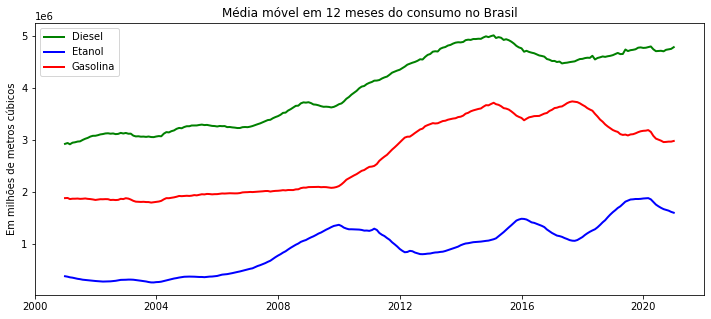

In [18]:
plt.rcParams["figure.figsize"] = (12, 5)
a=br_diesel.rolling(12).mean() #média movel 12 meses do diesel
b=br_etanol.rolling(12).mean() #média movel 12 meses do etanol
c=br_gasolina.rolling(12).mean() #média movel 12 meses da gasolina
plt.plot(a,color='green', linewidth=2, label='Diesel')
plt.plot(b,color='blue', linewidth=2, label='Etanol')
plt.plot(c,color='red', linewidth=2, label='Gasolina')
plt.legend()
#plt.xlabel('Frequência mensal')
plt.ylabel('Em milhões de metros cúbicos')
plt.title("Média móvel em 12 meses do consumo no Brasil")
plt.show()

Nos dois gráficos acima temos uma informação sobre a tendência de nossa série.
Em ambos a sencação sobre o desenvolvimento da demanda é muito parecida com o que tinhamos nas séries originais.

Mais uma vez, <b>destaca-se a característica substituta entre a gasolina e o etanol.</b> No gráfico dos 8 estados selecionados percebe-que a tendência do consumo de <b>etanol voltou a subir após 2018, com o combustível, na média, se apresentando na 2° posição</b>, já em meados de 2019.

Porém, ao que parece, para os 8 estados selecionados essa dinâmica pode se reverter mais uma vez, pois no gráfico de tendencia percebemos um novo ponto de inflexão em 2020. Seria um novo ciclo para a relação substituta entre os combustíveis?

<b>Para o consumo de diesel, os dois gráficos mostram tendencias muito próximas.</b> Comparado a gasolina e ao etanol,<b> a quantidade consumida desse combustível parece não ter sido impactada pela pandemia em 2020, tal qual os demais</b>, o que pode ser explicado pela característica essencial das atividades, cujo os veículos que se utilizam dessa forma de energia são associados - principalmente dentro das cadeias logísticas -, não sofrendo tanto com as paralizações.

Sazonalidade do consumo

Vamos olhar a sazonalidade para cada uma das 6 bases

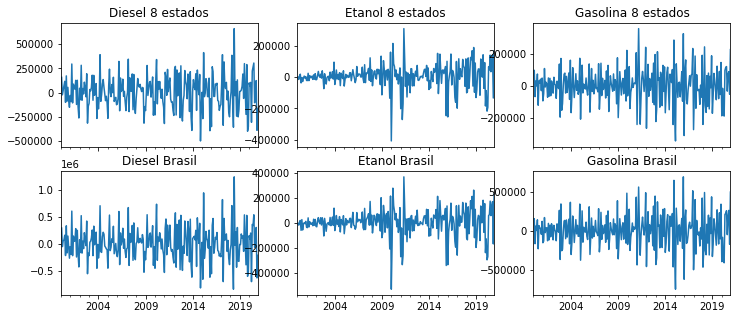

In [19]:
figs, axs = plt.subplots(nrows=2,ncols=3, figsize=(12,5),sharex=True)
#analisando a sazonalidade para os 8 estados selecionados
base_diesel.Valor.diff().plot(ax=axs[0][0],title='Diesel 8 estados')
base_etanol.Valor.diff().plot(ax=axs[0][1],title='Etanol 8 estados')
base_gasolina.Valor.diff().plot(ax=axs[0][2],title='Gasolina 8 estados')
#analisando a sazonalidade para os dados do Brasil
br_diesel.Valor.diff().plot(ax=axs[1][0],title='Diesel Brasil')
br_etanol.Valor.diff().plot(ax=axs[1][1],title='Etanol Brasil')
br_gasolina.Valor.diff().plot(ax=axs[1][2],title='Gasolina Brasil')
plt.show()

In [20]:
#criando uma função que retorna uma base com os últimos 3 anos
def ult_anos(dados):
    filtro = (dados.index.year >=2018) & (dados.index.year <=2020)
    return dados[filtro].copy()
#aqui teremos novas base com o período filtrado
base_d=ult_anos(base_diesel)
base_e=ult_anos(base_etanol)
base_g=ult_anos(base_gasolina)
br_d=ult_anos(br_diesel)
br_e=ult_anos(br_etanol)
br_g=ult_anos(br_gasolina)

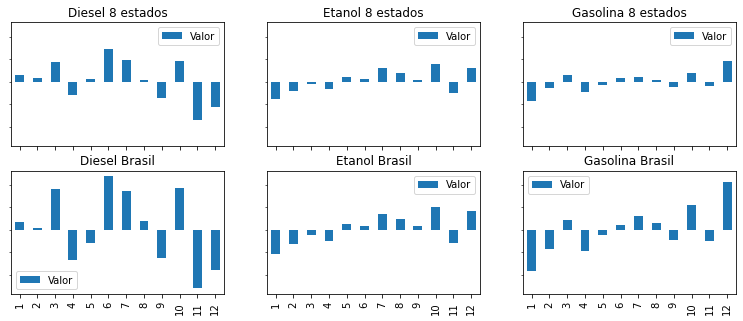

In [21]:
#Vamos verificar como se comporta a demanda em cada mês do ano
#Usaremos apenas uma média do consumo ao longo dos últimos 3 anos
figs, txs = plt.subplots(nrows=2,ncols=3, figsize=(13,5),sharex=True,sharey=True)
#analisando para os 8 estados selecionados
base_d.diff().groupby(base_d.index.month).mean().plot(kind='bar',ax=txs[0][0],title='Diesel 8 estados')
base_e.diff().groupby(base_e.index.month).mean().plot(kind='bar',ax=txs[0][1],title='Etanol 8 estados')
base_g.diff().groupby(base_g.index.month).mean().plot(kind='bar',ax=txs[0][2],title='Gasolina 8 estados')
#analisando para o Brasil
br_d.diff().groupby(br_d.index.month).mean().plot(kind='bar',ax=txs[1][0],title='Diesel Brasil')
br_e.diff().groupby(br_e.index.month).mean().plot(kind='bar',ax=txs[1][1],title='Etanol Brasil')
br_g.diff().groupby(br_g.index.month).mean().plot(kind='bar',ax=txs[1][2],title='Gasolina Brasil')
plt.yticks([])#removendo o eixo y para melhorar nossa visualização
plt.show()

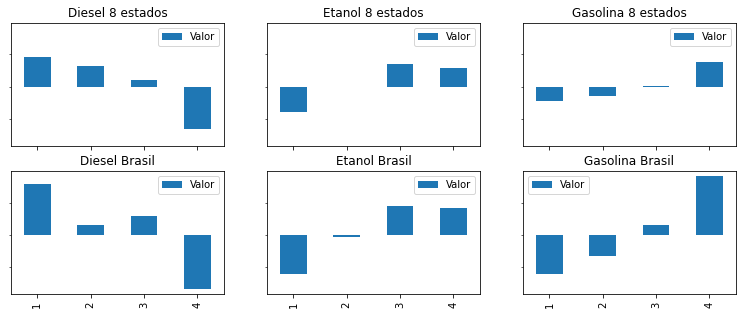

In [22]:
#Vamos verificar como se comporta a demanda em cada trimestre do ano
#Usaremos apenas uma média do consumo ao longo dos últimos 3 anos
figs, txs = plt.subplots(nrows=2,ncols=3, figsize=(13,5),sharex=True,sharey=True)
#analisando para os 8 estados selecionados
base_d.diff().groupby(base_d.index.quarter).mean().plot(kind='bar',ax=txs[0][0],title='Diesel 8 estados')
base_e.diff().groupby(base_e.index.quarter).mean().plot(kind='bar',ax=txs[0][1],title='Etanol 8 estados')
base_g.diff().groupby(base_g.index.quarter).mean().plot(kind='bar',ax=txs[0][2],title='Gasolina 8 estados')
#analisando para o Brasil
br_d.diff().groupby(br_d.index.quarter).mean().plot(kind='bar',ax=txs[1][0],title='Diesel Brasil')
br_e.diff().groupby(br_e.index.quarter).mean().plot(kind='bar',ax=txs[1][1],title='Etanol Brasil')
br_g.diff().groupby(br_g.index.quarter).mean().plot(kind='bar',ax=txs[1][2],title='Gasolina Brasil')
plt.yticks([])#removendo o eixo y para melhorar nossa visualização
plt.show()

In [23]:
#Vamos analisar a correlação do consumo nos últimos 3 anos
corr_data=pd.DataFrame()
#criando um dataframe com os valores de consumo nos últimos 3 anos
corr_data['Diesel_8']=base_d.Valor
corr_data['Etanol_8']=base_e.Valor
corr_data['Gasolina_8']=base_g.Valor
corr_data['Diesel_br']=br_d.Valor
corr_data['Etanol_br']=br_e.Valor
corr_data['Gasolina_br']=br_g.Valor
# criar uma matriz de correlação
corr = corr_data.corr()
display(corr)

,Diesel_8,Etanol_8,Gasolina_8,Diesel_br,Etanol_br,Gasolina_br
Diesel_8,1.000000,0.329704,0.037475,0.974382,0.257055,0.071414
Etanol_8,0.329704,1.000000,0.217587,0.447987,0.989676,0.438181
Gasolina_8,0.037475,0.217587,1.000000,0.142204,0.247659,0.963435
Diesel_br,0.974382,0.447987,0.142204,1.000000,0.383362,0.200211
Etanol_br,0.257055,0.989676,0.247659,0.383362,1.000000,0.455642
Gasolina_br,0.071414,0.438181,0.963435,0.200211,0.455642,1.000000


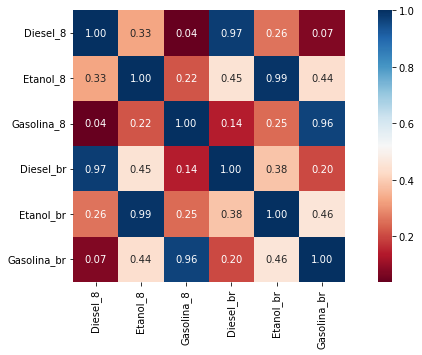

In [24]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Nos 3 gráfcios de barra acima realizamos um processo de diferenciação de 1° ordem, o intuito foi retirar os efeitos da tendência e dos choques de nossas séries originais, trazendo para o centro à questão da sazonalidade do consumo.

O 1° gráfico mostra uma série estacionária para cada um dos consumos estudados. Visualmente, não é possível extrair muitas informações relevantes, apenas que os efeitos sazonais para o consumo nos 8 estados selecionados são bem próximos dos vistos no dados para o Brasil.

Porém, a partir desses gráficos podemos responder algumas perguntas relevantes para o nosso problema. <b>A primeira é quais meses do ano são os maios forte e mais fracos em termos do consumo de combustíveis?</b>

No 1° gráfico foi considerado todo o espaço temporal da amostra (2000 -  2020). No entanto, para extrair uma métrica mais próxima do atual foi realizado uma filtragem de datas, considerando os valores a partir de 2018. Além disso, de forma prática, consideramos uma média do consumo em cada mês, para todos os 3 anos. 

Essa filtragem é evidenciada no 2° gráfico, em que temos a média da diferença de consumo em cada ano. Ou seja, responde a seguinte pergunta: Qual foi o crescimento médio (em termos nominais) do consumo em um mês frente ao mês anterior.

Nele, é possível visualizar que em março, abril, junho, julho e outubro são os meses em que o consumo de diesel cresce na comparação mensal, isso nos 8 estados e no Brasil. 

Seguindo esse mesmo racional, no 3° gráfico respondemos a mesma questão só que agrupando os dados em trimestre. Complementando este dashboard, abixo dele, temos uma matriz de correlações dos últimos 3 anos. 

Uma pergunta que poderia ser respondida a partir do 3° gráfico e da matriz de correlação é se <b>seria possível obter uma diversificação de receitas se preparando para mudanças sazonais no consumo de cada combustível.</b>

O 4° trimestre é um período de queda no consumo de diesel mas de crescimento para a compra de gasolina e etanol. Enquanto que no 1° trimestre, o diesel cresce seu consumo e os demais sofrem um arrefecimento em suas demandas.

Na comparação entre o consumo visto nos 8 estados e em todo terrítorio nacional a sazonalidade não se mostra muito diferente, percorrendo os mesmo sentido, o que fica bem claro na matriz de correlação, em que todos os valores calculados estão próximos de 1.

Chama a atenção a baixíssima correlação entre o diesel e a gasolina, muito próxima de 0, o que representa pouca interdependência entre os dois produtos. Na prática, significa que, nos últimos 3 anos, os determinantes do consumo de diesel têm mantido certa diferença comparado ao consumo da gasolina. 

No entanto, essa divergência pode está associada ao efeito da pandemia, que limitou o uso de veículos movidos tanto a gasolina quanto a etanol em função das medidas de restrições a mobilidade social. Veja que a correlação entre diesel e etanol também é baixa.

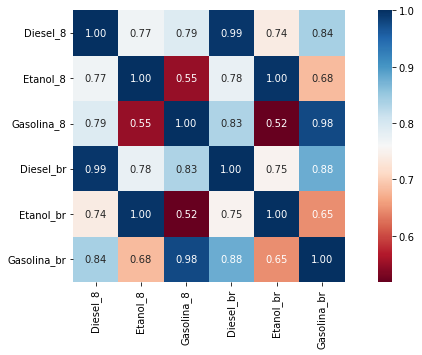

In [25]:
#Vamos analisar a correlação do consumo em todo o período da amostra (2000-2020)
corr_data1=pd.DataFrame()
#criando um dataframe com os valores de consumo nos últimos 3 anos
corr_data1['Diesel_8']=base_diesel.Valor
corr_data1['Etanol_8']=base_etanol.Valor
corr_data1['Gasolina_8']=base_gasolina.Valor
corr_data1['Diesel_br']=br_diesel.Valor
corr_data1['Etanol_br']=br_etanol.Valor
corr_data1['Gasolina_br']=br_gasolina.Valor
# criar uma matriz de correlação
corr = corr_data1.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

De fato, como suspeitado, perceba que na correlação entre gasolina e diesel, para todo o período da amostra, o coeficiente e signitivamente maior, acima de 0,75.

# Análise do consumo por estado

A partir desse momento ampliaremos nosso horizonte de análise. Vamos verificar como se dá a dinâmica de consumo de combustíveis em cada estado de nossa amostra.

In [26]:
#criando uma função que extrai séries de tempo para cada estado individualmente
#uma série para cada tipo de combustível em frequência mensal
def filtrar_estados(DF,UF,tipo):
    DF['Datas']=pd.to_datetime(DF['Periodo'])
    filtro= (DF.Estado==UF) & (DF.Tipo==tipo)
    DF_1=DF[filtro].copy()
    DF_1.set_index(DF_1.Datas,inplace=True)
    DF_1.sort_index(inplace=True)
    DF_2=DF_1.Valor.copy()
    return DF_2

In [27]:
#Vamos coletar nossas séries de tempo, uma para cada estado e cada tipo de combustível

#Diesel
df_diesel=filtrar_estados(base,'df','Diesel')
go_diesel=filtrar_estados(base,'go','Diesel')
ma_diesel=filtrar_estados(base,'ma','Diesel')
mt_diesel=filtrar_estados(base,'mt','Diesel')
mg_diesel=filtrar_estados(base,'mg','Diesel')
pa_diesel=filtrar_estados(base,'pa','Diesel')
sp_diesel=filtrar_estados(base,'sp','Diesel')
to_diesel=filtrar_estados(base,'to','Diesel')

#Etanol
df_etanol=filtrar_estados(base,'df','Etanol')
go_etanol=filtrar_estados(base,'go','Etanol')
ma_etanol=filtrar_estados(base,'ma','Etanol')
mt_etanol=filtrar_estados(base,'mt','Etanol')
mg_etanol=filtrar_estados(base,'mg','Etanol')
pa_etanol=filtrar_estados(base,'pa','Etanol')
sp_etanol=filtrar_estados(base,'sp','Etanol')
to_etanol=filtrar_estados(base,'to','Etanol')

#Gasolina
df_gas=filtrar_estados(base,'df','Gasolina')
go_gas=filtrar_estados(base,'go','Gasolina')
ma_gas=filtrar_estados(base,'ma','Gasolina')
mt_gas=filtrar_estados(base,'mt','Gasolina')
mg_gas=filtrar_estados(base,'mg','Gasolina')
pa_gas=filtrar_estados(base,'pa','Gasolina')
sp_gas=filtrar_estados(base,'sp','Gasolina')
to_gas=filtrar_estados(base,'to','Gasolina')

### Diesel

#### Série original

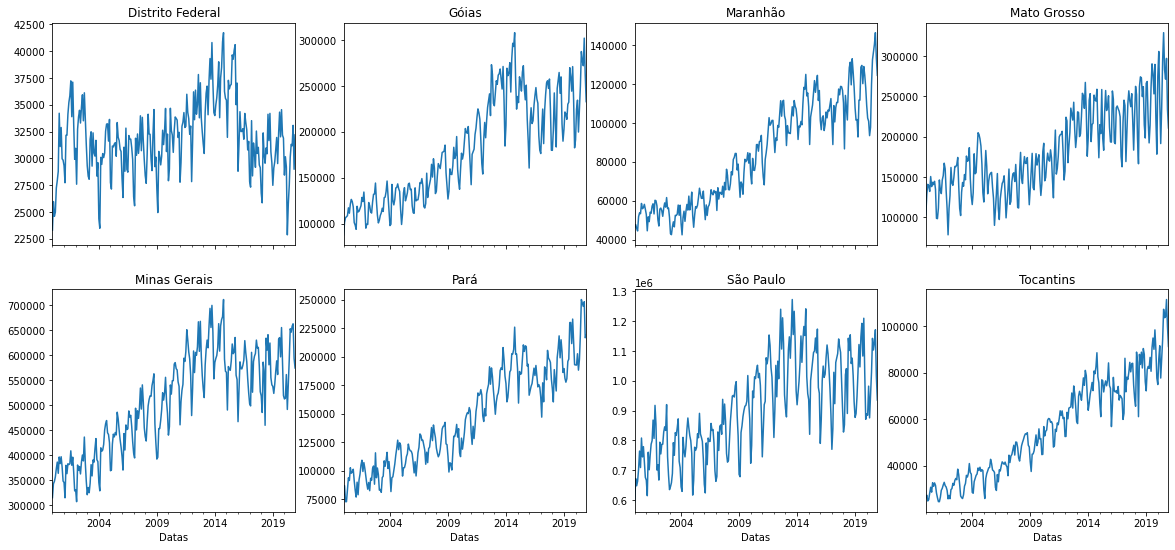

In [28]:
figs, wxs = plt.subplots(nrows=2,ncols=4, figsize=(20,9),sharex=True)
#analisando a sazonalidade para os 8 estados selecionados
df_diesel.plot(ax=wxs[0][0],title='Distrito Federal')
go_diesel.plot(ax=wxs[0][1],title='Góias')
ma_diesel.plot(ax=wxs[0][2],title='Maranhão')
mt_diesel.plot(ax=wxs[0][3],title='Mato Grosso')
mg_diesel.plot(ax=wxs[1][0],title='Minas Gerais')
pa_diesel.plot(ax=wxs[1][1],title='Pará')
sp_diesel.plot(ax=wxs[1][2],title='São Paulo')
to_diesel.plot(ax=wxs[1][3],title='Tocantins')
plt.show()

#### Tendência

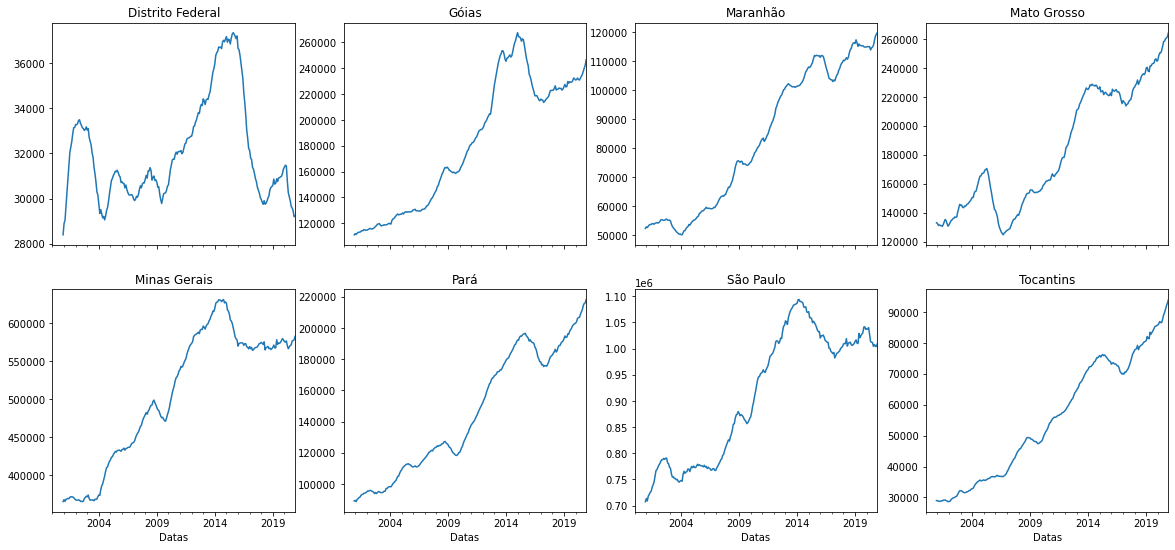

In [29]:
figs, wxs = plt.subplots(nrows=2,ncols=4, figsize=(20,9),sharex=True)
#analisando a sazonalidade para os 8 estados selecionados
df_diesel.rolling(12).mean().plot(ax=wxs[0][0],title='Distrito Federal')
go_diesel.rolling(12).mean().plot(ax=wxs[0][1],title='Góias')
ma_diesel.rolling(12).mean().plot(ax=wxs[0][2],title='Maranhão')
mt_diesel.rolling(12).mean().plot(ax=wxs[0][3],title='Mato Grosso')
mg_diesel.rolling(12).mean().plot(ax=wxs[1][0],title='Minas Gerais')
pa_diesel.rolling(12).mean().plot(ax=wxs[1][1],title='Pará')
sp_diesel.rolling(12).mean().plot(ax=wxs[1][2],title='São Paulo')
to_diesel.rolling(12).mean().plot(ax=wxs[1][3],title='Tocantins')
plt.show()

### Etanol

#### Sazonalidade

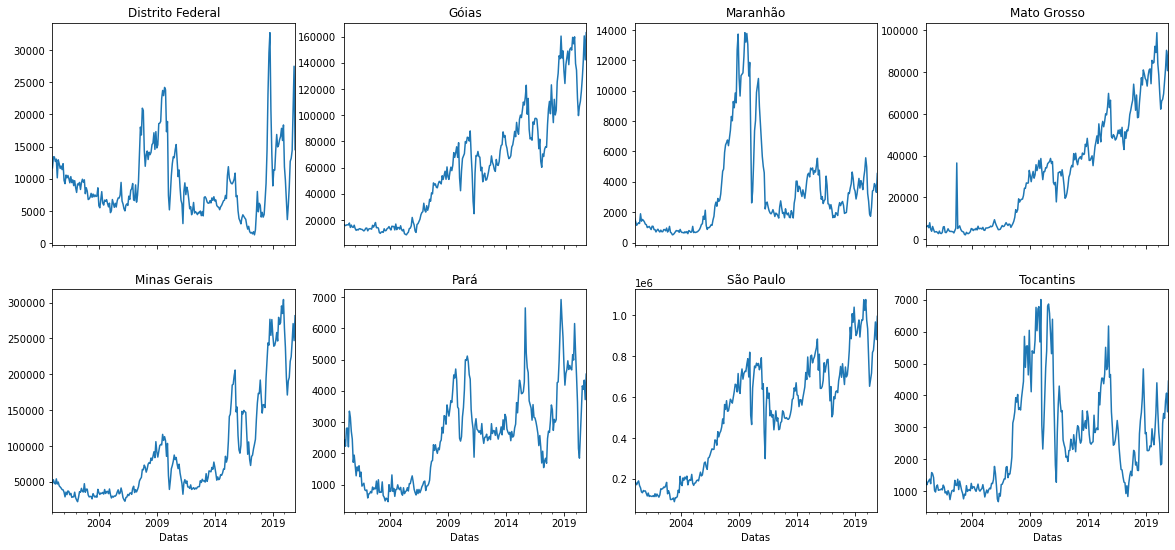

In [30]:
figs, wxs = plt.subplots(nrows=2,ncols=4, figsize=(20,9),sharex=True)
#analisando a sazonalidade para os 8 estados selecionados
df_etanol.plot(ax=wxs[0][0],title='Distrito Federal')
go_etanol.plot(ax=wxs[0][1],title='Góias')
ma_etanol.plot(ax=wxs[0][2],title='Maranhão')
mt_etanol.plot(ax=wxs[0][3],title='Mato Grosso')
mg_etanol.plot(ax=wxs[1][0],title='Minas Gerais')
pa_etanol.plot(ax=wxs[1][1],title='Pará')
sp_etanol.plot(ax=wxs[1][2],title='São Paulo')
to_etanol.plot(ax=wxs[1][3],title='Tocantins')
plt.show()

#### Tendência

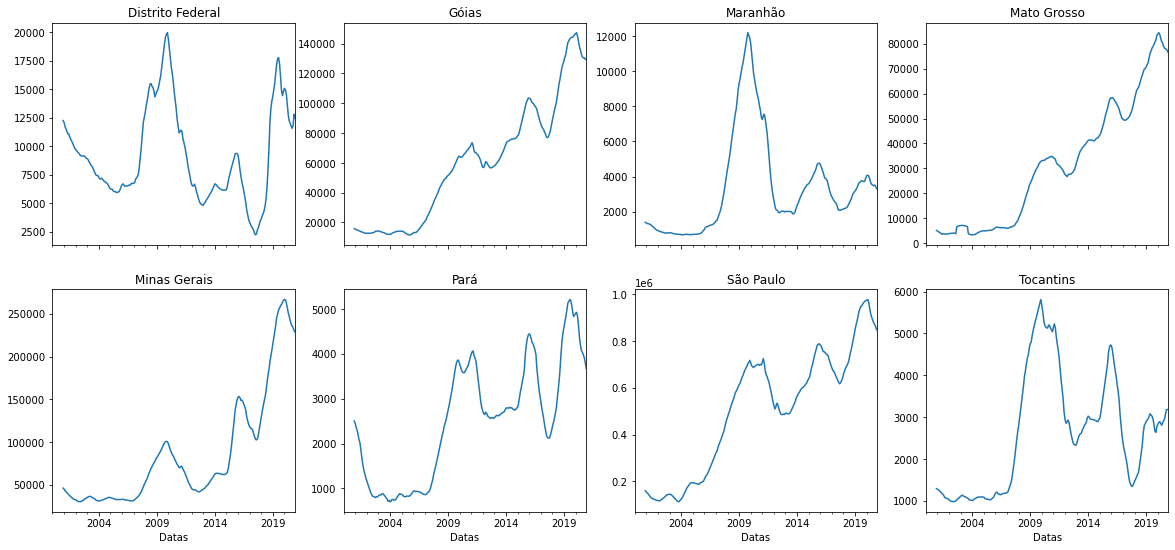

In [31]:
figs, wxs = plt.subplots(nrows=2,ncols=4, figsize=(20,9),sharex=True)
#analisando a sazonalidade para os 8 estados selecionados
df_etanol.rolling(12).mean().plot(ax=wxs[0][0],title='Distrito Federal')
go_etanol.rolling(12).mean().plot(ax=wxs[0][1],title='Góias')
ma_etanol.rolling(12).mean().plot(ax=wxs[0][2],title='Maranhão')
mt_etanol.rolling(12).mean().plot(ax=wxs[0][3],title='Mato Grosso')
mg_etanol.rolling(12).mean().plot(ax=wxs[1][0],title='Minas Gerais')
pa_etanol.rolling(12).mean().plot(ax=wxs[1][1],title='Pará')
sp_etanol.rolling(12).mean().plot(ax=wxs[1][2],title='São Paulo')
to_etanol.rolling(12).mean().plot(ax=wxs[1][3],title='Tocantins')
plt.show()

### Gasolina

#### Série original

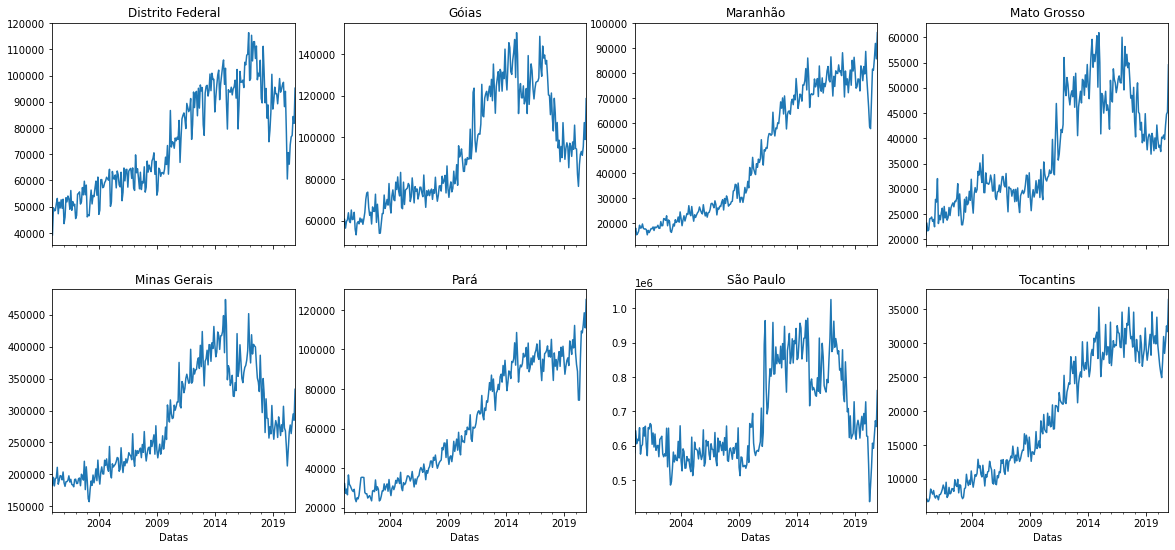

In [32]:
figs, wxs = plt.subplots(nrows=2,ncols=4, figsize=(20,9),sharex=True)
#analisando a sazonalidade para os 8 estados selecionados
df_gas.plot(ax=wxs[0][0],title='Distrito Federal')
go_gas.plot(ax=wxs[0][1],title='Góias')
ma_gas.plot(ax=wxs[0][2],title='Maranhão')
mt_gas.plot(ax=wxs[0][3],title='Mato Grosso')
mg_gas.plot(ax=wxs[1][0],title='Minas Gerais')
pa_gas.plot(ax=wxs[1][1],title='Pará')
sp_gas.plot(ax=wxs[1][2],title='São Paulo')
to_gas.plot(ax=wxs[1][3],title='Tocantins')
plt.show()

#### Tendência

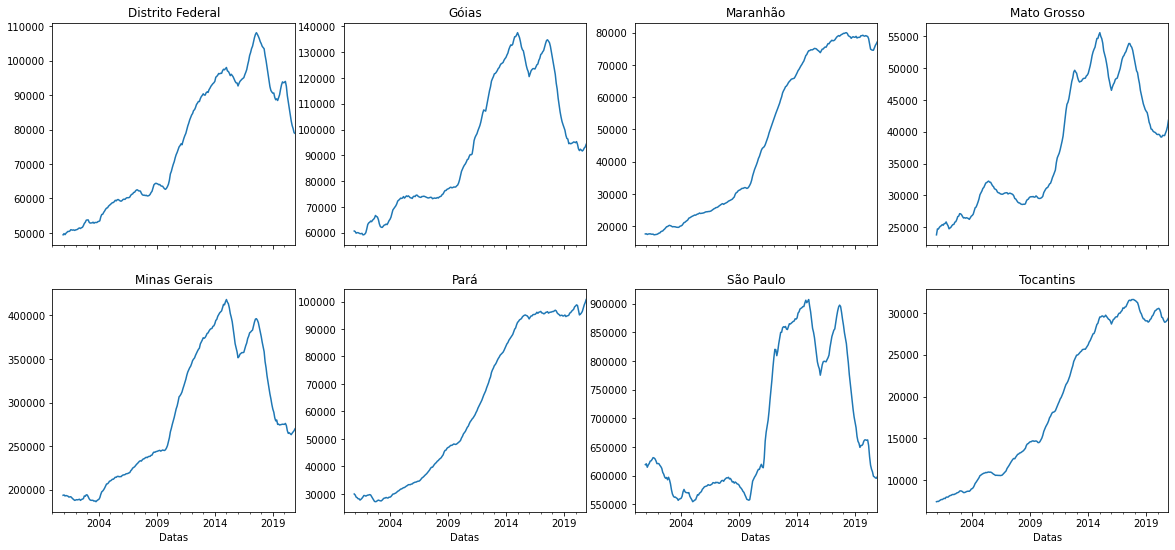

In [33]:
figs, wxs = plt.subplots(nrows=2,ncols=4, figsize=(20,9),sharex=True)
#analisando a sazonalidade para os 8 estados selecionados
df_gas.rolling(12).mean().plot(ax=wxs[0][0],title='Distrito Federal')
go_gas.rolling(12).mean().plot(ax=wxs[0][1],title='Góias')
ma_gas.rolling(12).mean().plot(ax=wxs[0][2],title='Maranhão')
mt_gas.rolling(12).mean().plot(ax=wxs[0][3],title='Mato Grosso')
mg_gas.rolling(12).mean().plot(ax=wxs[1][0],title='Minas Gerais')
pa_gas.rolling(12).mean().plot(ax=wxs[1][1],title='Pará')
sp_gas.rolling(12).mean().plot(ax=wxs[1][2],title='São Paulo')
to_gas.rolling(12).mean().plot(ax=wxs[1][3],title='Tocantins')
plt.show()

In [34]:
#https://www.youtube.com/watch?v=JuG8hwVK5uQ

#Explorando funcionalidades de datas
#https://www.youtube.com/watch?v=NBs5hWTcuY0

#modelo de regressão
#https://www.youtube.com/watch?v=RbVLNzBkhZE

#FAC e FACP
#https://www.youtube.com/watch?v=OLAfJakUHbs